#Wine Quality

**Data Set Information:**
TBC

**Attribute Information:**

**-type:** red wine or white wine, nominal qunatity; <br>
**-fixed acidity:** grams of tataric acid per 100ml, ratio qunatity; <br>
**-volatile acidity:** grams of acetic acid per liter of wine, ratio qunatity; <br>
**-citric acid:** grams per liter, ratio qunatity; <br>
**-residual sugar:** grams per liter, ratio qunatity; <br>
**-chlorides:** grams of sodium chloride per liter, ratio qunatity; <br>
**-free sulfur dioxide:** milligrams per liter, ratio qunatity; <br>
**-total sulfur dioxide:** milligrams per liter, ratio qunatity; <br>
**-density:** grams per cubic centimeter, ratio qunatity; <br>
**-pH:** ratio qunatity; <br>
**-sulphates:** grams of potassium sulfate per liter, ratio qunatity; <br>
**-alcohol:** vol.%, ratio qunatity; <br>
**-quality:** Output variable, score between 0 and 10, subjective(?), ordinal qunantity 

Preprocessing:
Combine two .csv files (one for red wine, one for white wine) into one file with the new attribute "type".





# General Data Preparation
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### Get the Data

In [2]:
data = pd.read_csv('wineQualityBothTypes.csv', delimiter = ';')

In [3]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Basic Data Information 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
data.describe(include = 'object')

,type
count,6497
unique,2
top,white
freq,4898


Check missing values

In [7]:
print(data.isnull().sum(axis=0))

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Exploratory Data Analysis

### Quality

In [8]:
#split data into red and white again
dataRed = data.loc[data['type'] == 'red']
dataWhite = data.loc[data['type'] == 'white']

#### Histograms

Text(0.5, 0, 'quality')

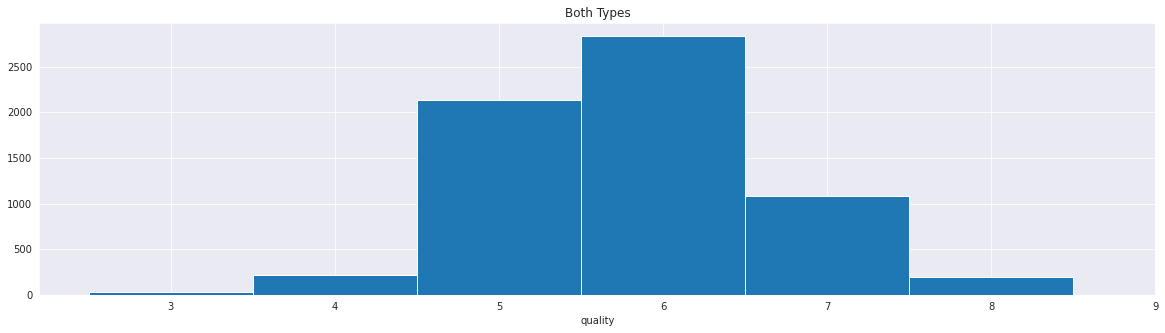

In [9]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
bins = np.arange(data['quality'].min(), data['quality'].max()+1)
plt.hist(data['quality'], bins=bins, align='left')
plt.title("Both Types")
plt.xticks(bins)
plt.xlabel('quality')

#### Split into white wine and red wine
White wine:

Text(0.5, 0, 'quality')

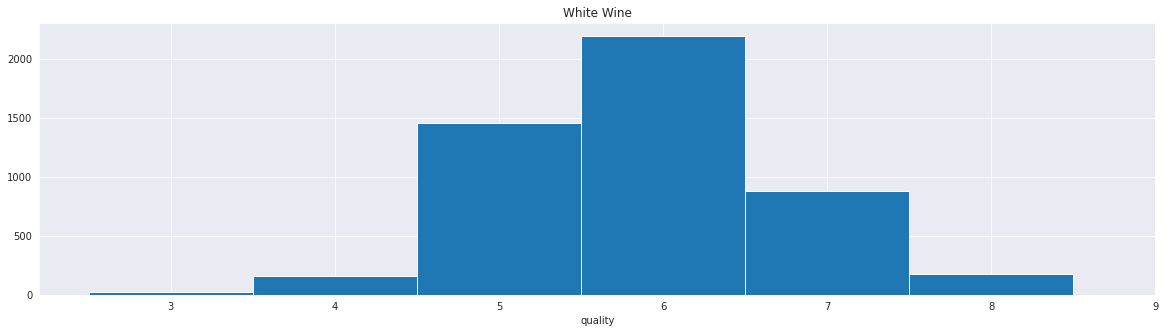

In [10]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
dataWhite = data.loc[data['type'] == 'white']
bins = np.arange(dataWhite['quality'].min(), dataWhite['quality'].max()+1)
plt.hist(dataWhite['quality'], bins=bins, align='left')
plt.title("White Wine")
plt.xticks(bins)
plt.xlabel('quality')

Red wine:

Text(0.5, 0, 'quality')

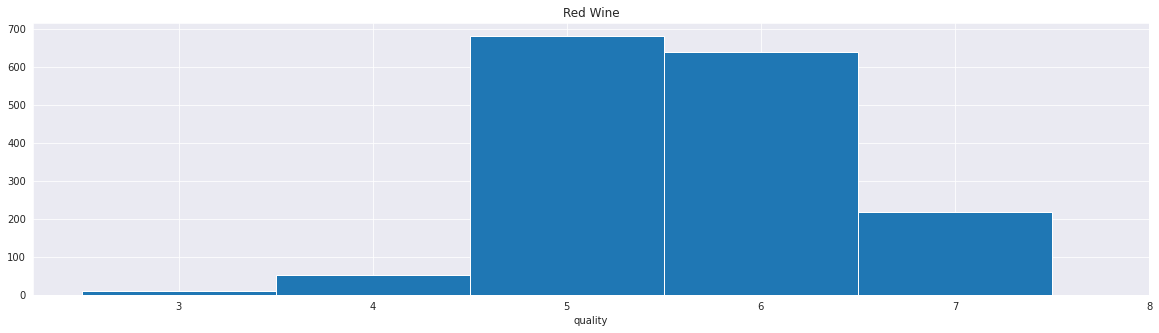

In [11]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
bins = np.arange(dataRed['quality'].min(), dataRed['quality'].max()+1)
plt.hist(dataRed['quality'], bins=bins, align='left')
plt.title("Red Wine")
plt.xticks(bins)
plt.xlabel('quality')

### Fixed Acidity vs. Quality 

#### Both types

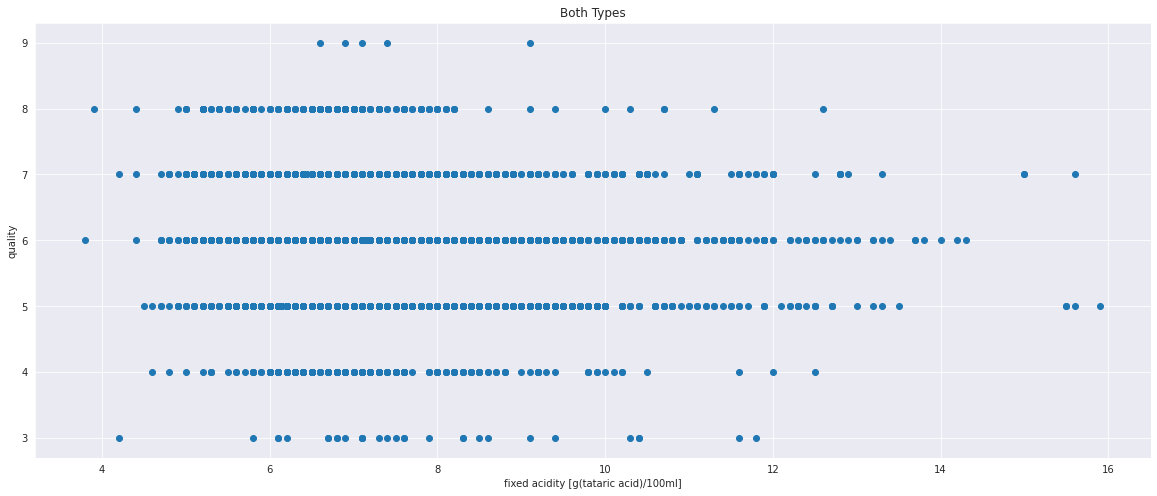

In [12]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['fixed acidity'], data['quality'])
plt.title("Both Types")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### Red Wine

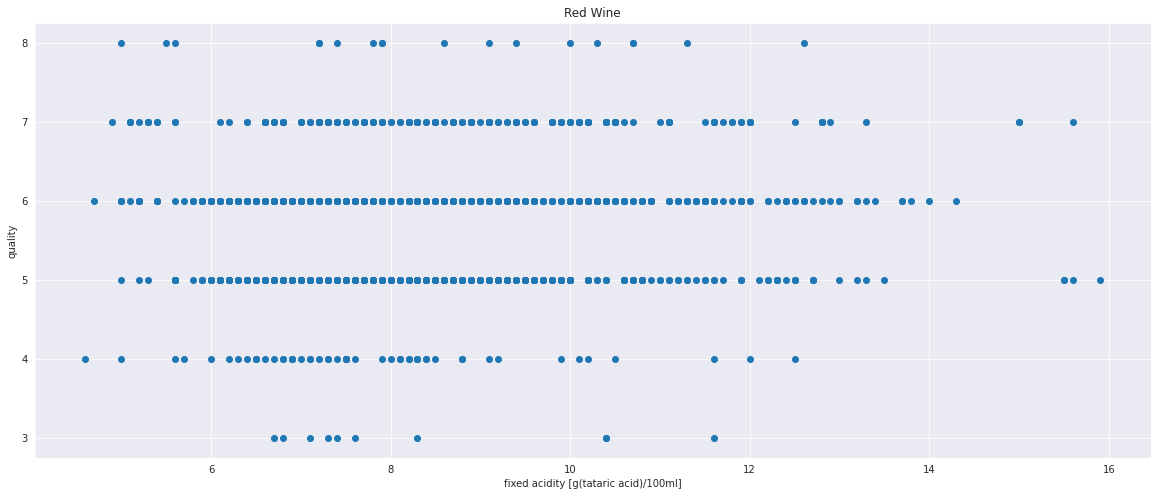

In [13]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['fixed acidity'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### White Wine

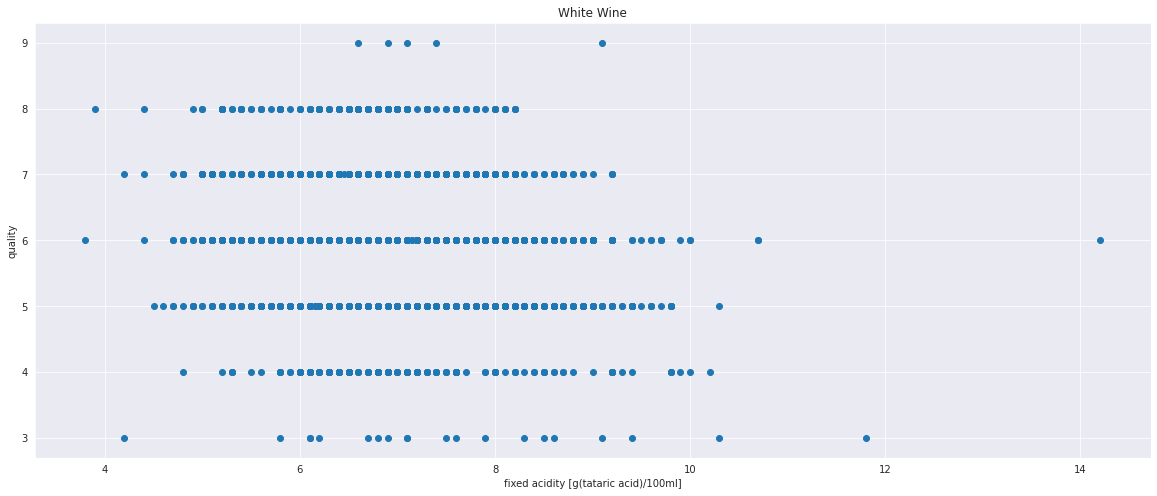

In [14]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['fixed acidity'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('fixed acidity [g(tataric acid)/100ml]')
plt.ylabel('quality')
plt.show()

### Volatile Acidity vs. Quality 

#### Both types

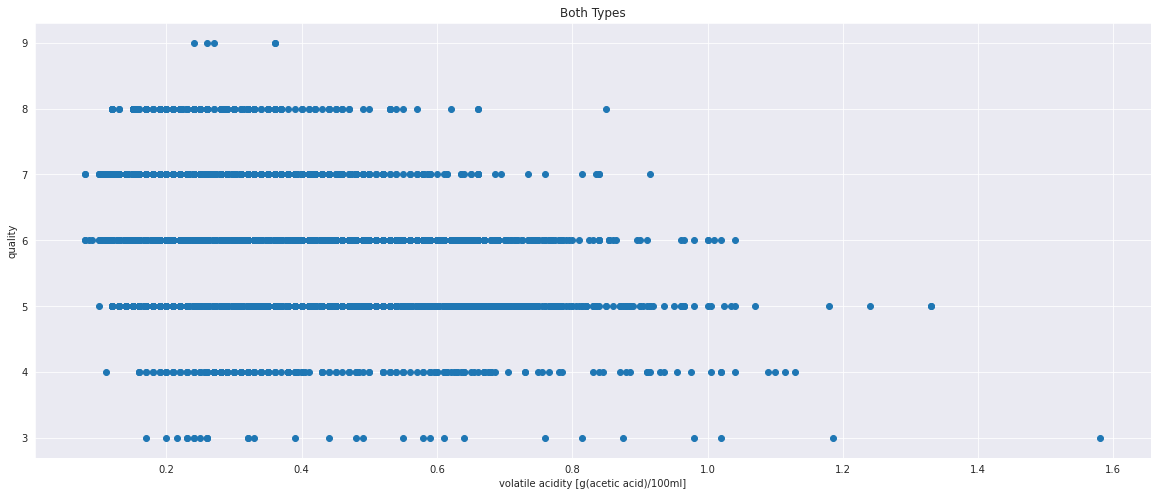

In [15]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['volatile acidity'], data['quality'])
plt.title("Both Types")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### Red Wine

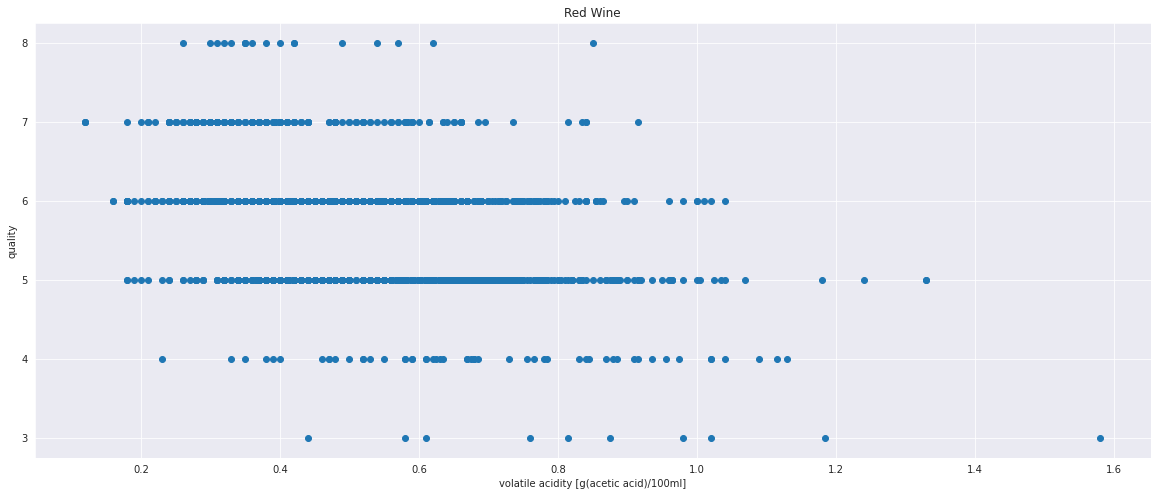

In [16]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['volatile acidity'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

#### White Wine

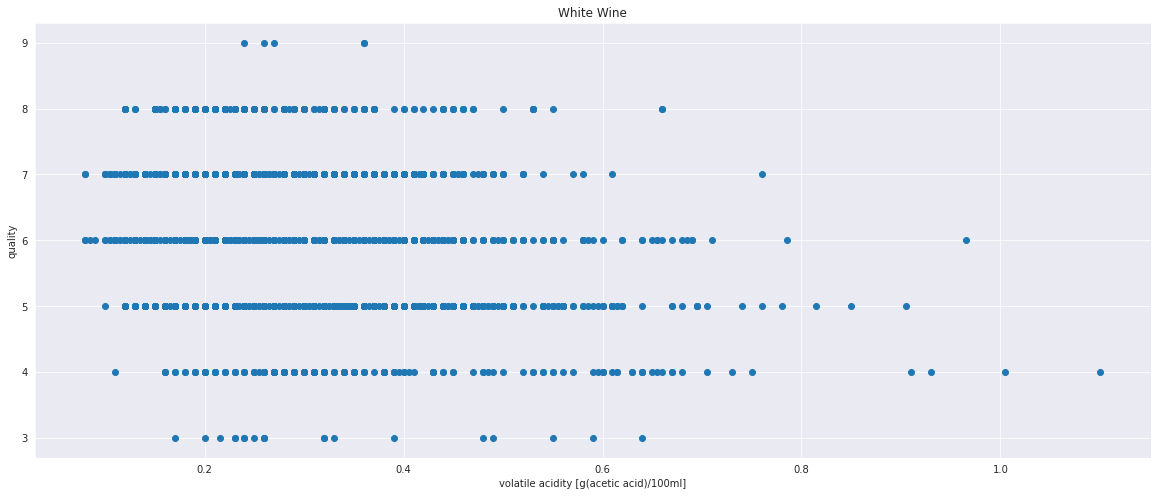

In [17]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['volatile acidity'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('volatile acidity [g(acetic acid)/100ml]')
plt.ylabel('quality')
plt.show()

### Citric Acid vs. Quality 

#### Both types

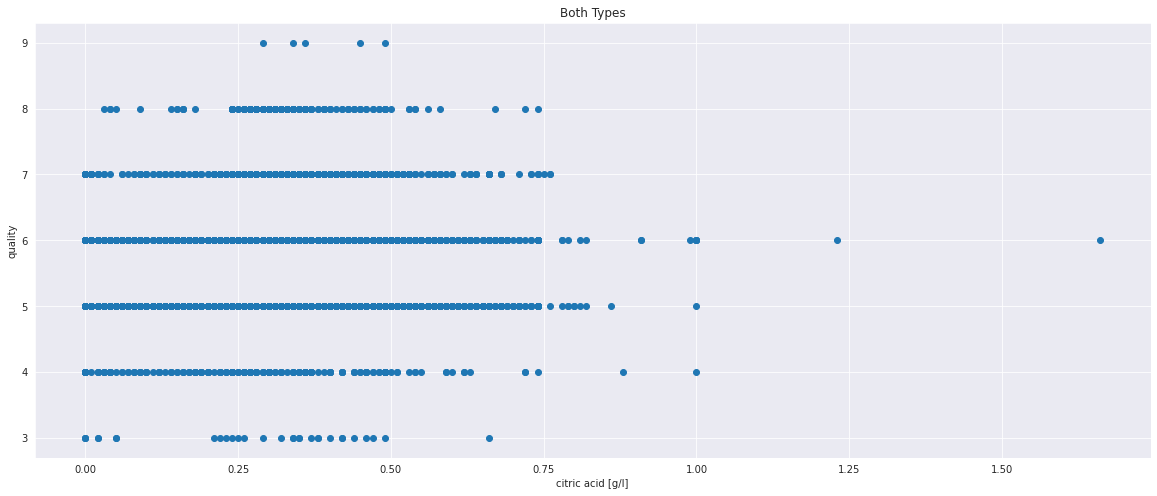

In [18]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['citric acid'], data['quality'])
plt.title("Both Types")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

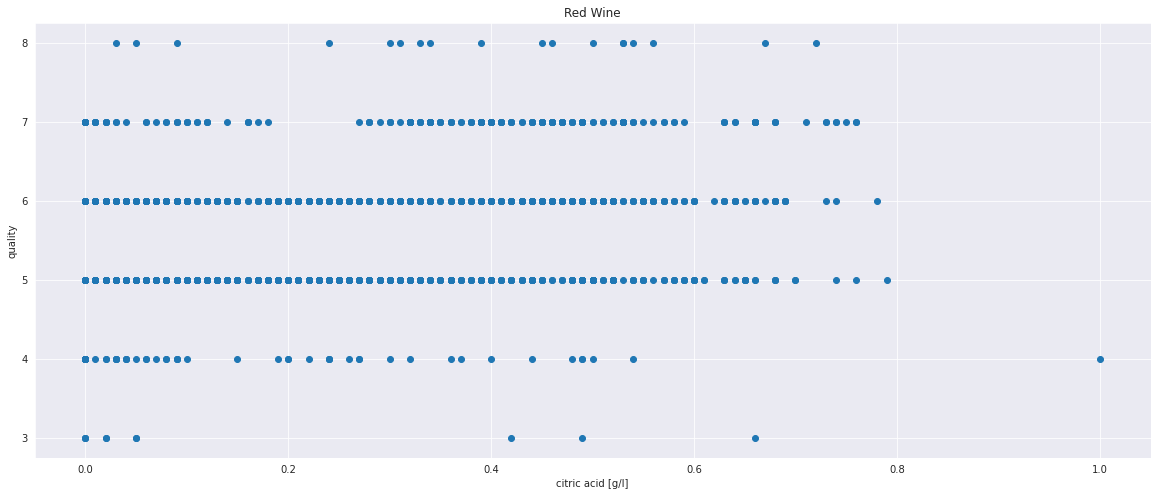

In [19]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['citric acid'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

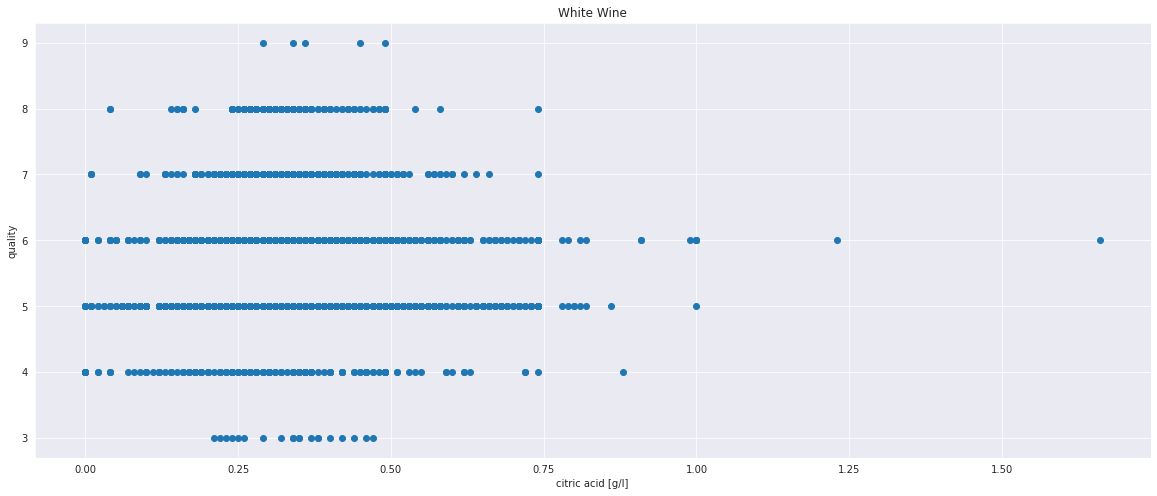

In [20]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['citric acid'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('citric acid [g/l]')
plt.ylabel('quality')
plt.show()

### Residual Sugar vs. Quality 

#### Both types

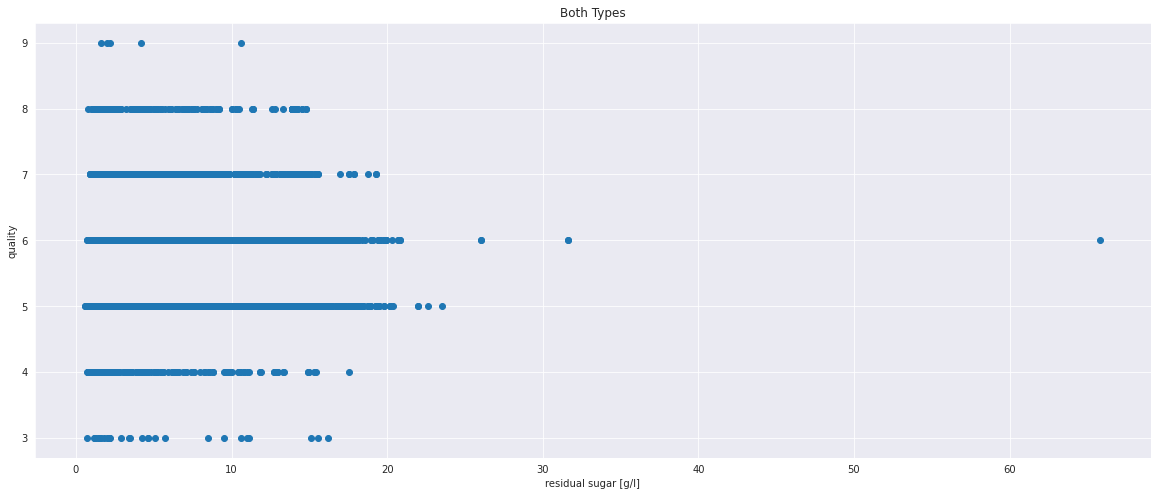

In [21]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['residual sugar'], data['quality'])
plt.title("Both Types")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

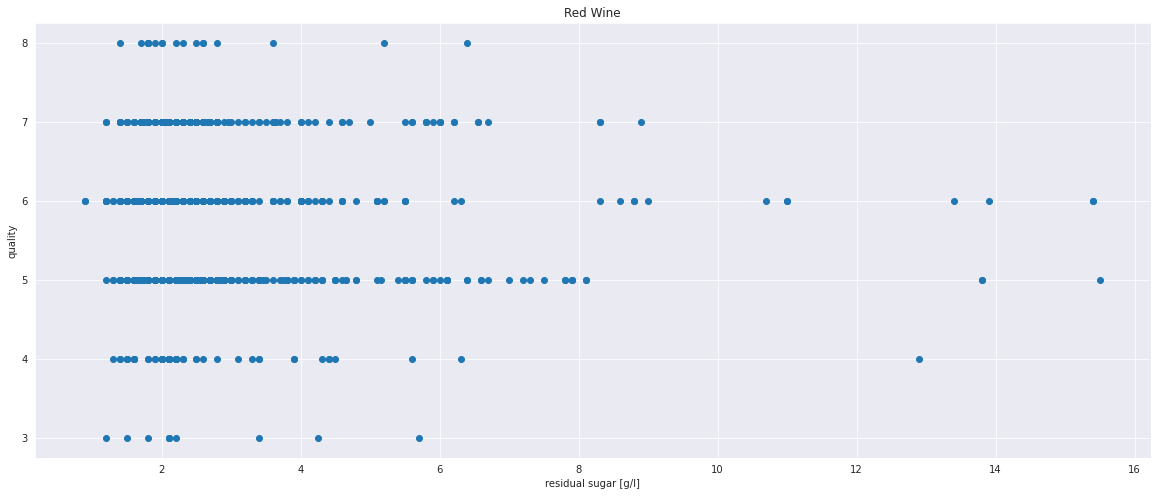

In [22]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['residual sugar'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

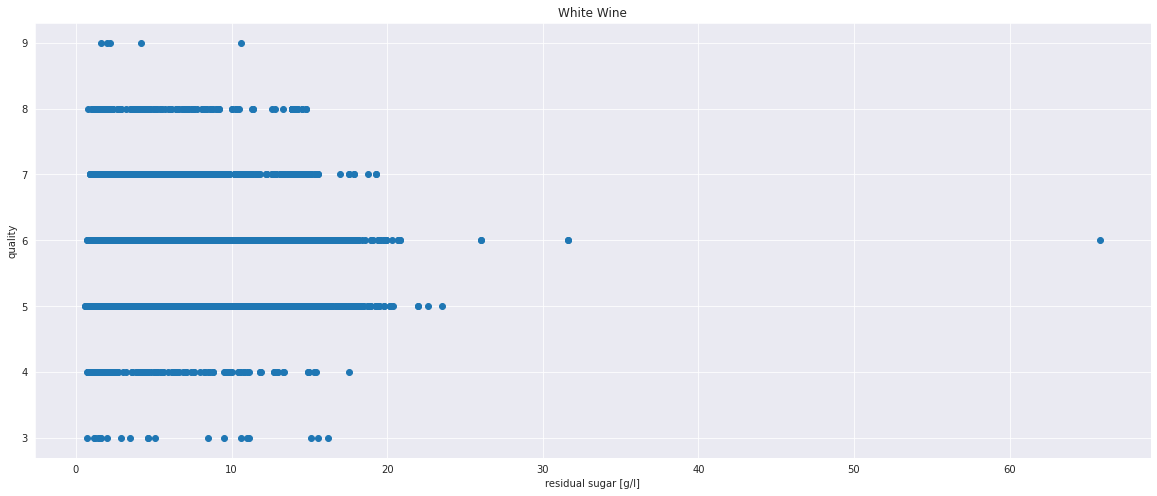

In [23]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['residual sugar'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('residual sugar [g/l]')
plt.ylabel('quality')
plt.show()

### Chlorides vs. Quality 

#### Both types

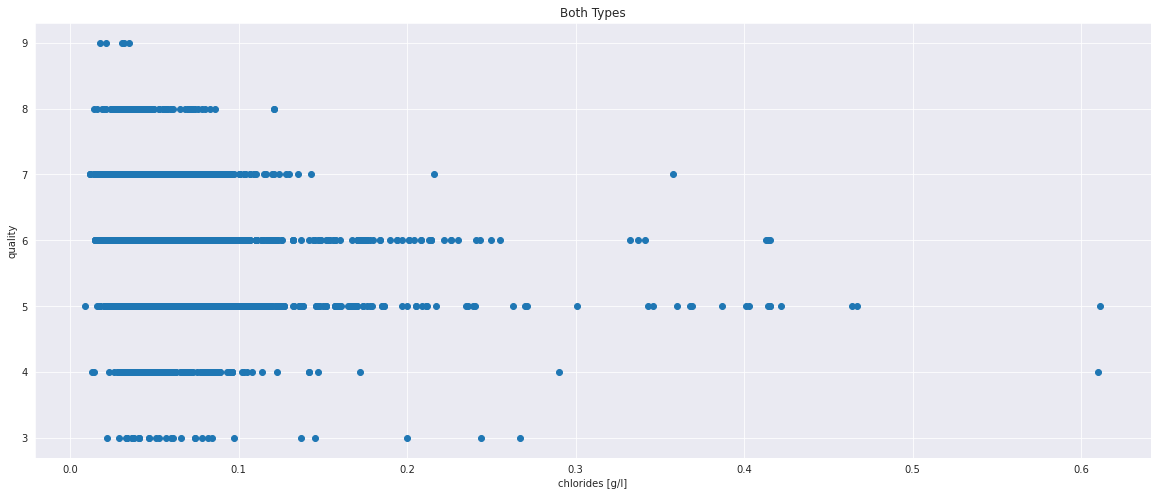

In [24]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['chlorides'], data['quality'])
plt.title("Both Types")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

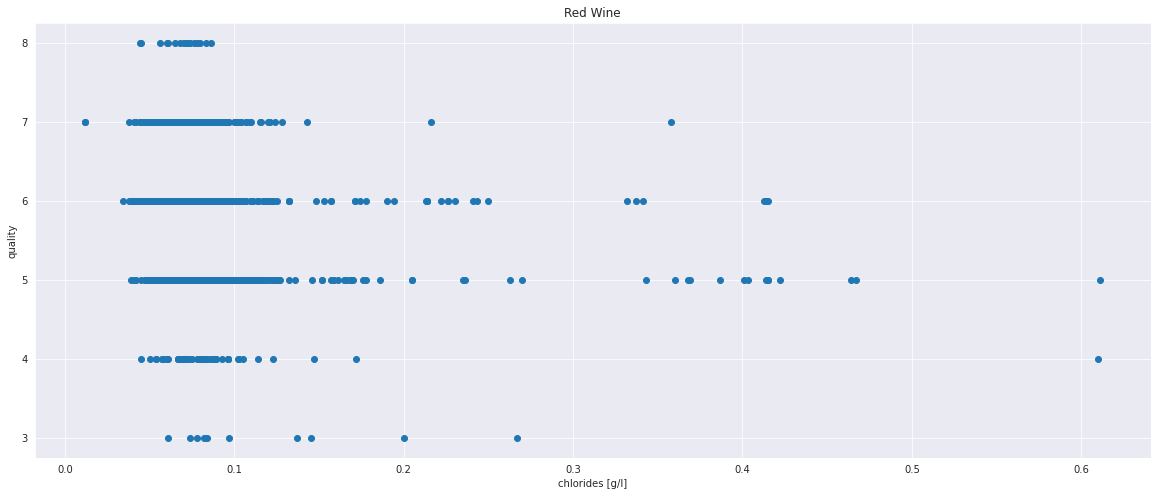

In [25]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['chlorides'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

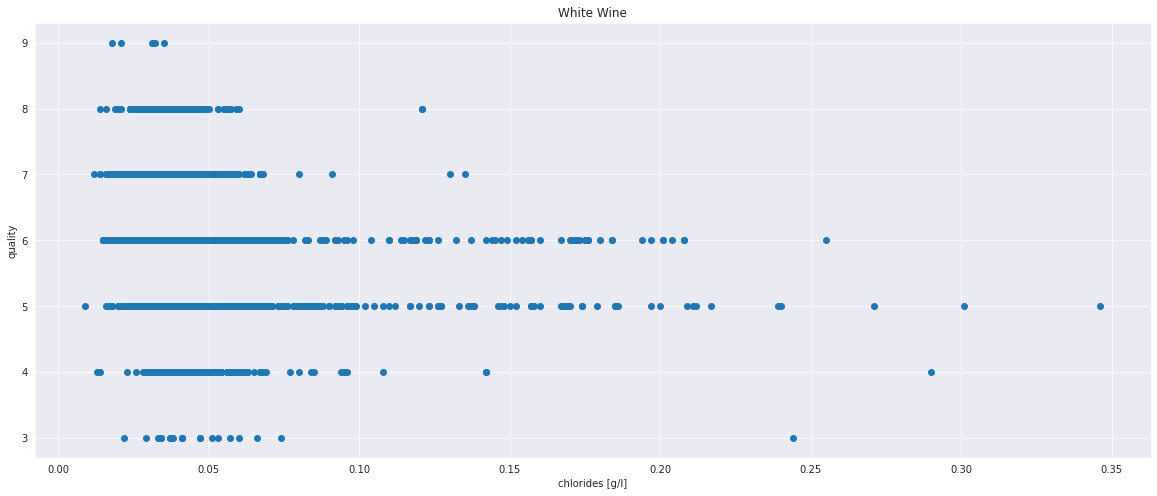

In [26]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['chlorides'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('chlorides [g(sodium chloride)/l]')
plt.ylabel('quality')
plt.show()

### Free Sulfur Dioxide vs. Quality 

#### Both types

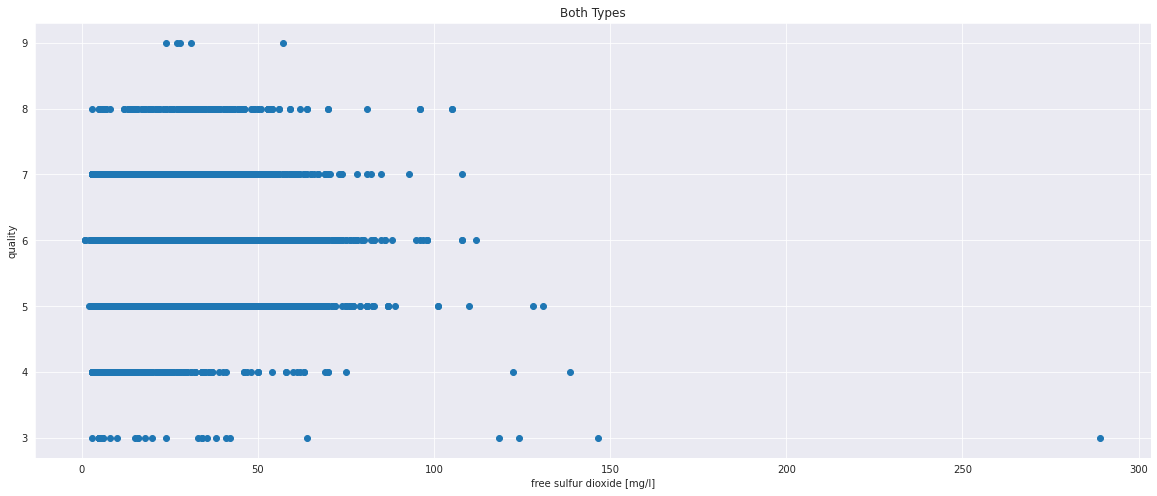

In [43]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['free sulfur dioxide'], data['quality'])
plt.title("Both Types")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

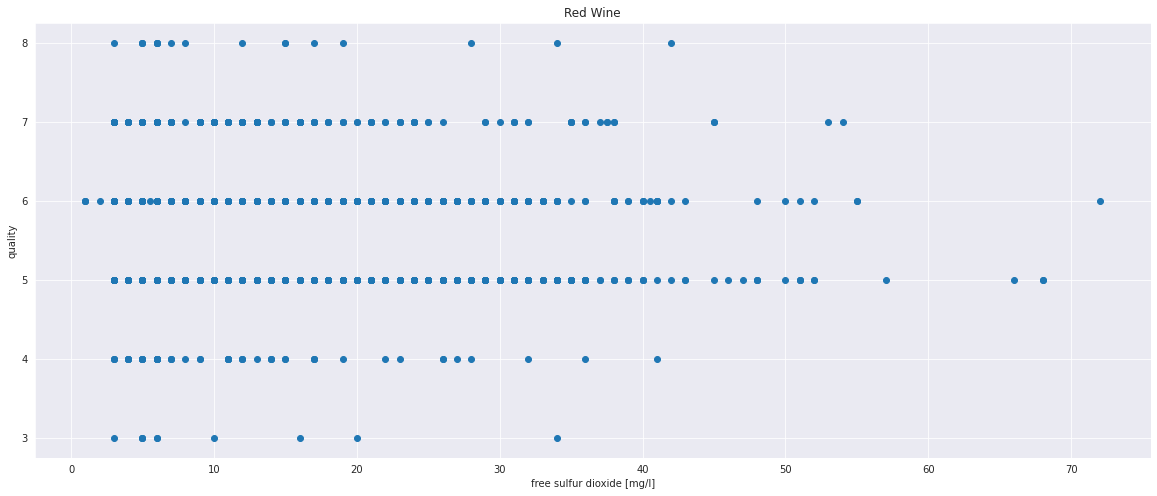

In [44]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['free sulfur dioxide'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

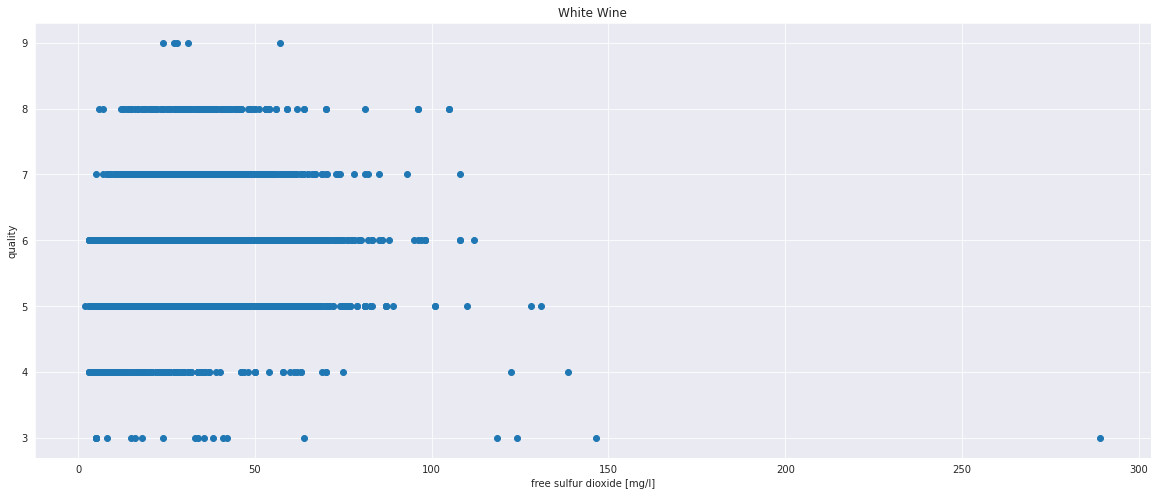

In [45]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['free sulfur dioxide'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('free sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

### Total Sulfur Dioxide vs. Quality 

#### Both types

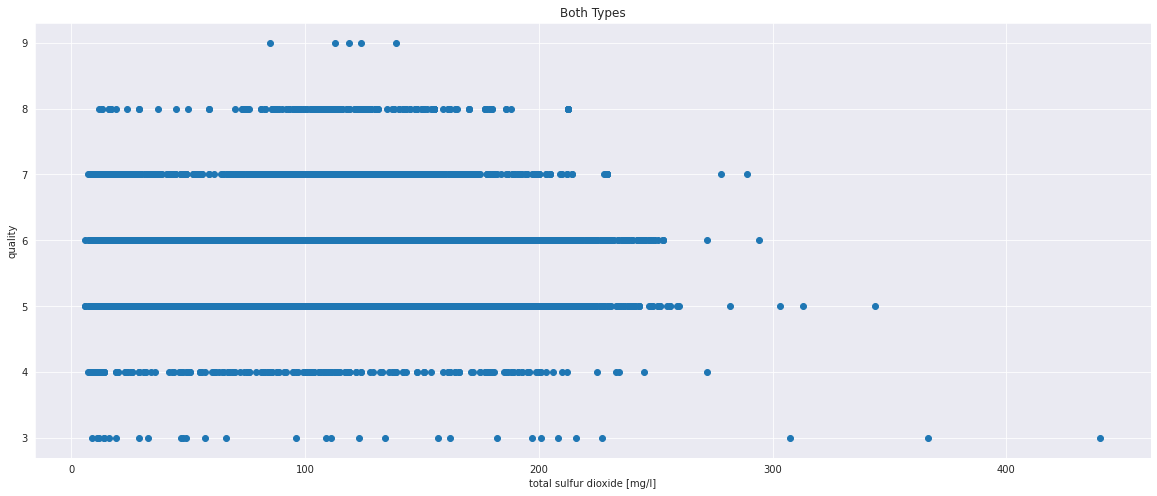

In [47]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['total sulfur dioxide'], data['quality'])
plt.title("Both Types")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

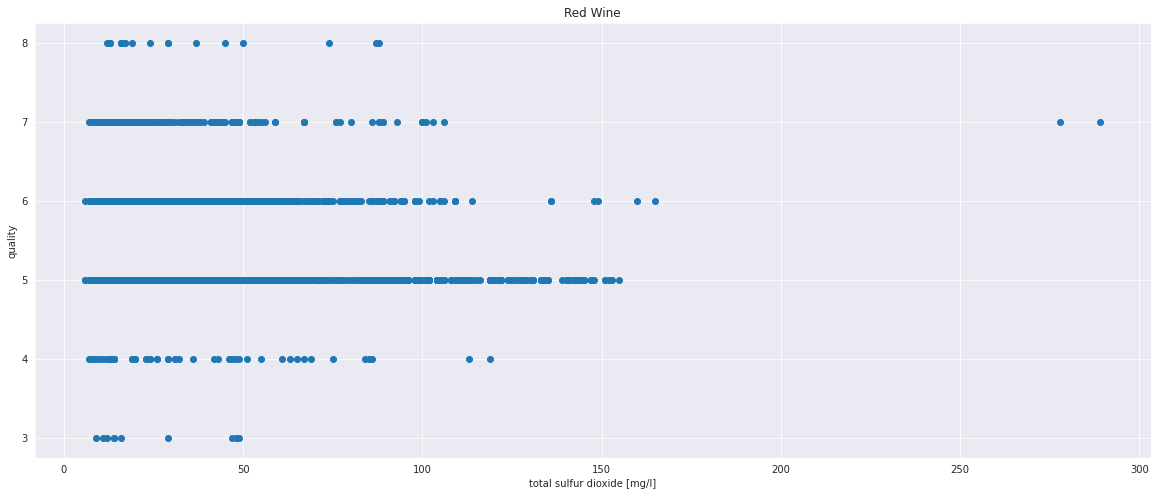

In [46]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['total sulfur dioxide'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

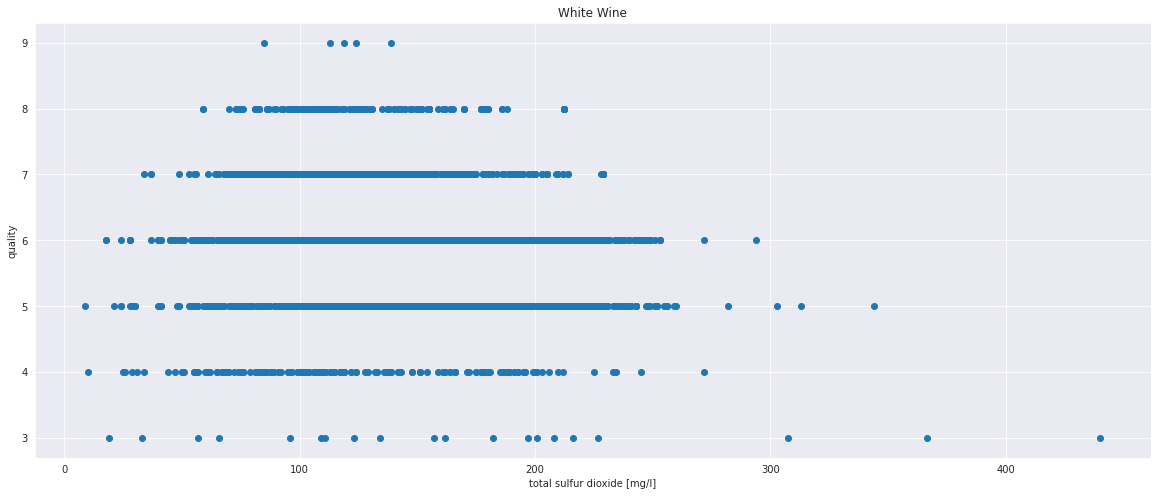

In [48]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['total sulfur dioxide'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('total sulfur dioxide [mg/l]')
plt.ylabel('quality')
plt.show()

### Density vs. Quality 

#### Both types

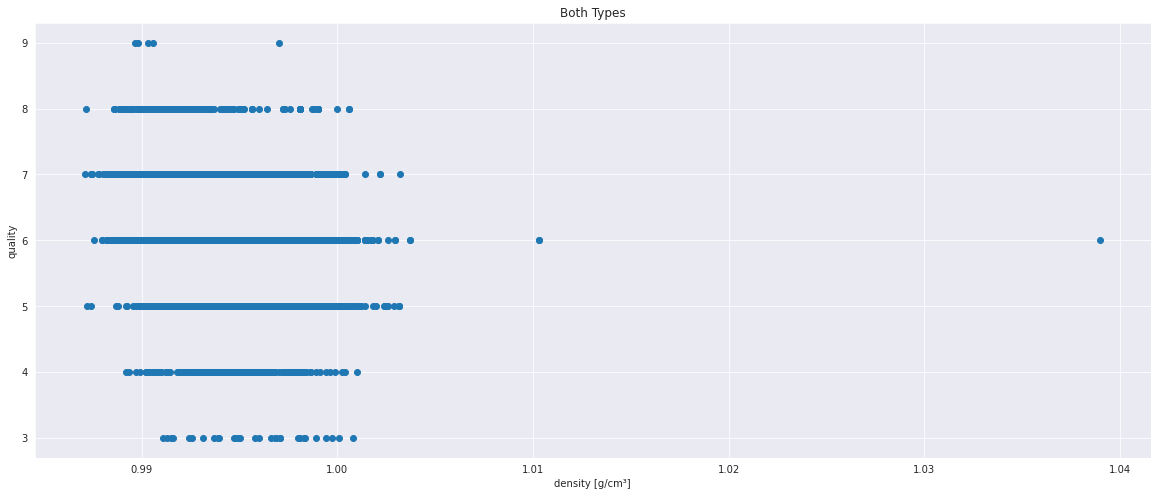

In [49]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['density'], data['quality'])
plt.title("Both Types")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

#### Red Wine

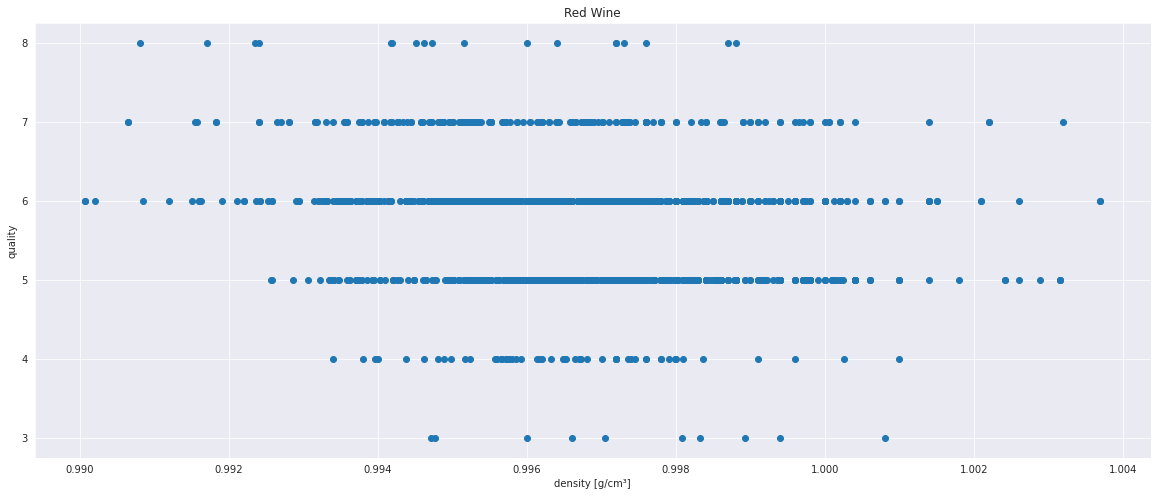

In [50]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['density'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

#### White Wine

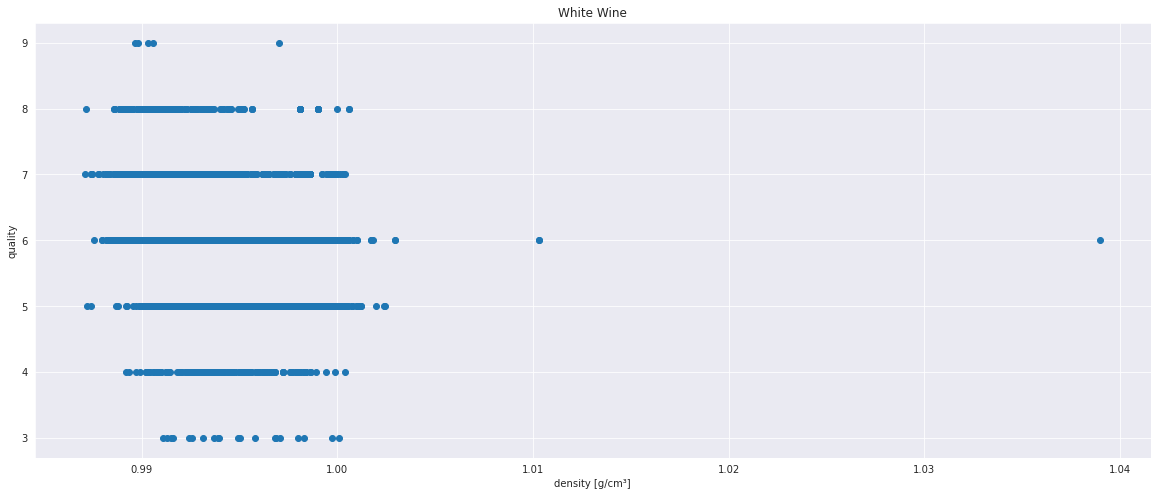

In [51]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['density'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('density [g/cm³]')
plt.ylabel('quality')
plt.show()

### pH value vs. Quality 

#### Both types

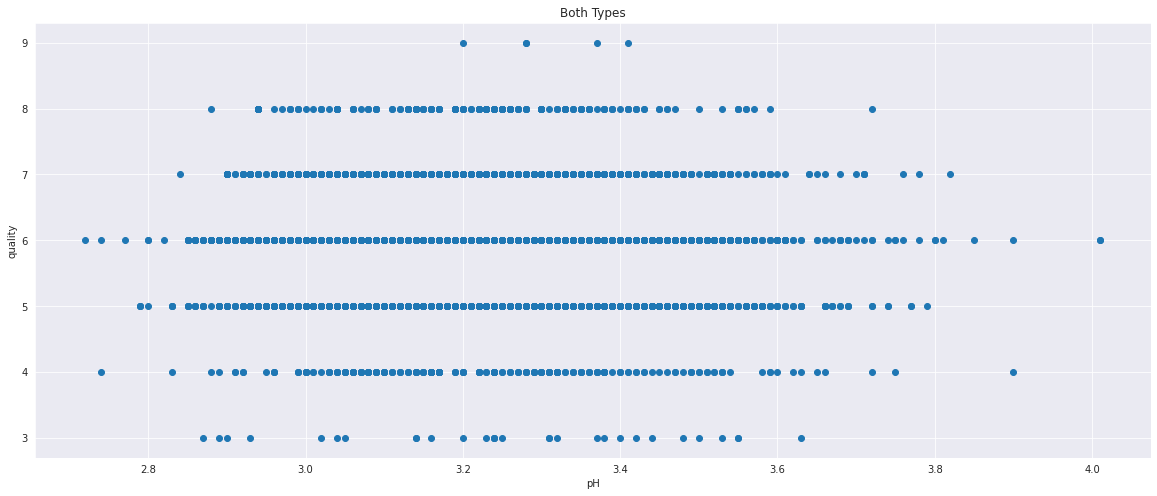

In [52]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['pH'], data['quality'])
plt.title("Both Types")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

#### Red Wine

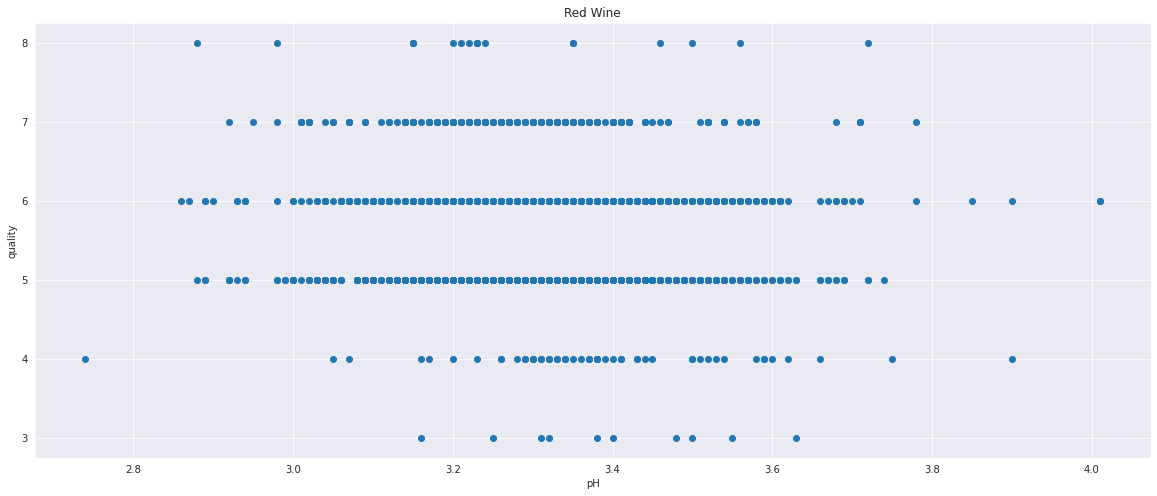

In [53]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['pH'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

#### White Wine

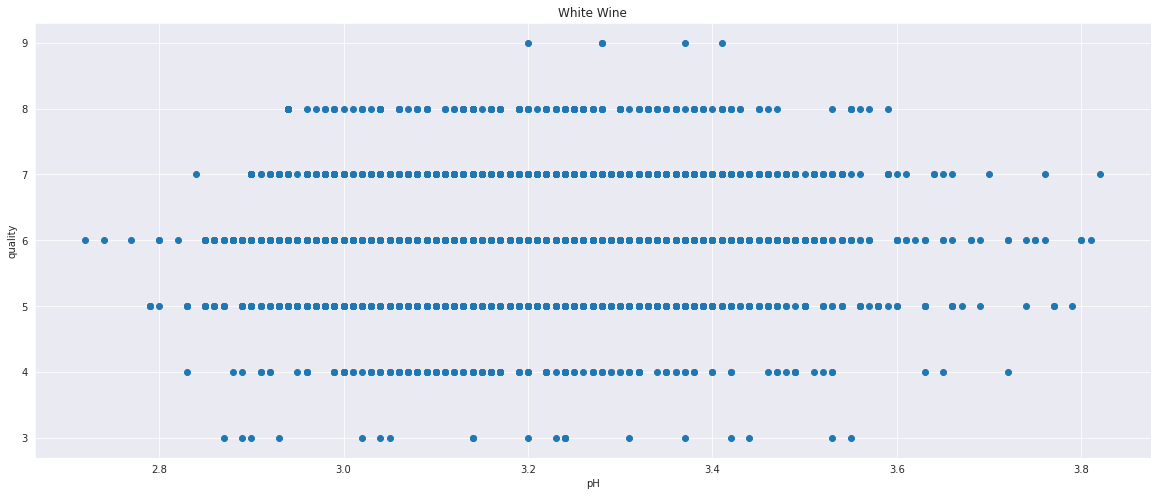

In [54]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['pH'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

### Sulphates vs. Quality 

#### Both types

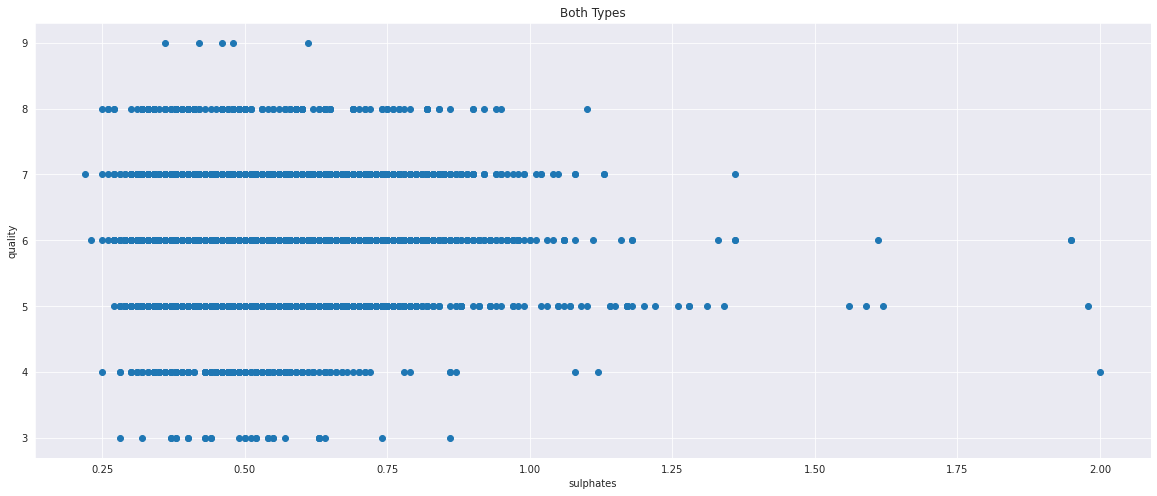

In [56]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['sulphates'], data['quality'])
plt.title("Both Types")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

#### Red Wine

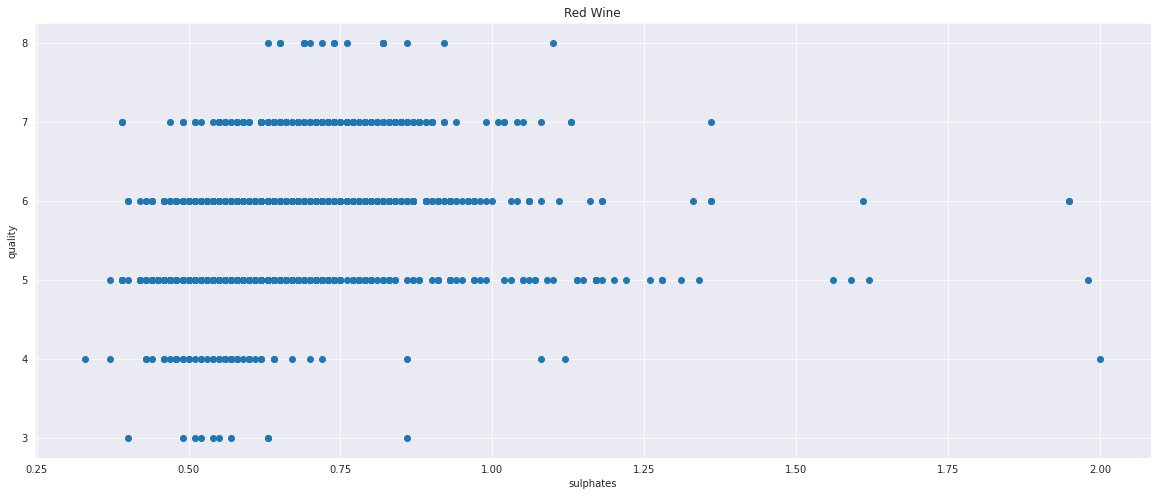

In [57]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['sulphates'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

#### White Wine

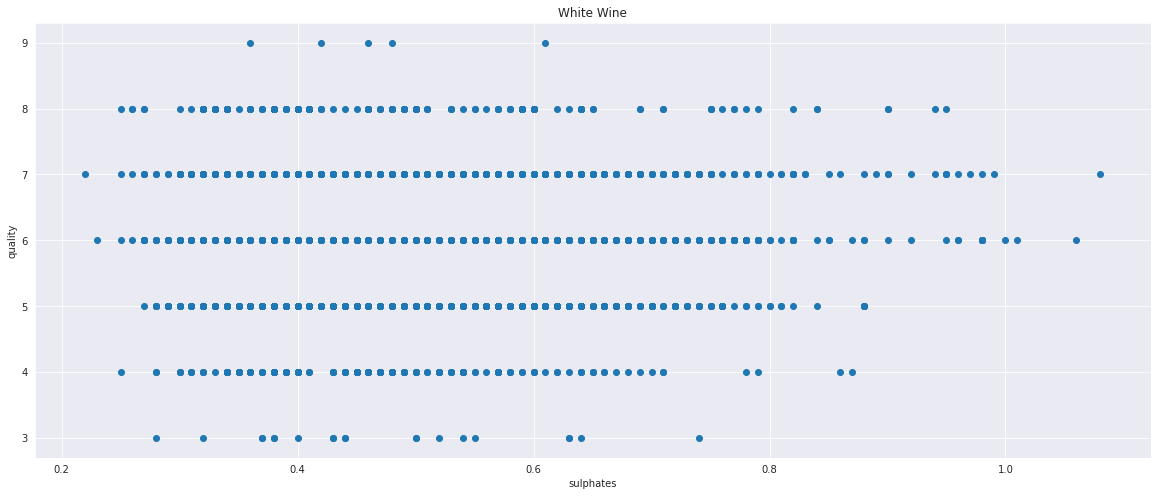

In [58]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['sulphates'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('sulphates [g(potassium sulfate)/l]')
plt.ylabel('quality')
plt.show()

### Alcohol Content vs. Quality 

#### Both types

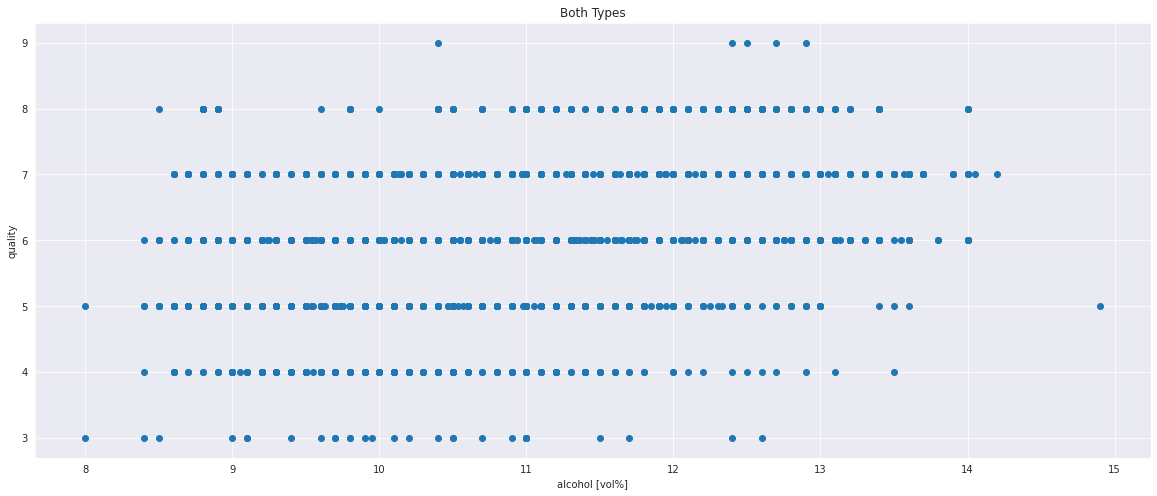

In [63]:
plt.figure(figsize=(20, 8))
#sns.jointplot(data['fixed acidity'], data['quality'], kind='reg')
plt.scatter(data['alcohol'], data['quality'])
plt.title("Both Types")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

#### Red Wine

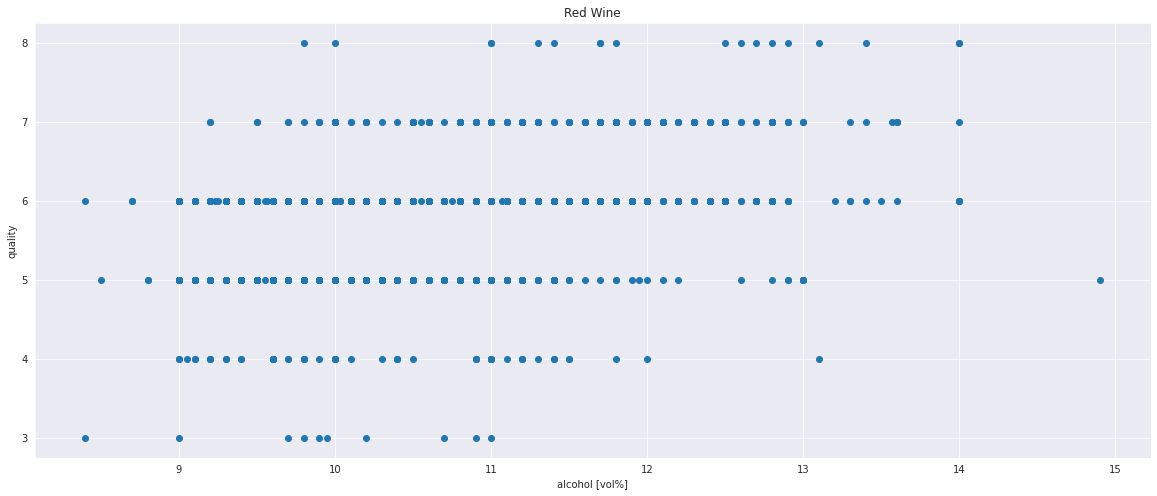

In [62]:
plt.figure(figsize=(20, 8))
plt.scatter(dataRed['alcohol'], dataRed['quality'])
plt.title("Red Wine")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

#### White Wine

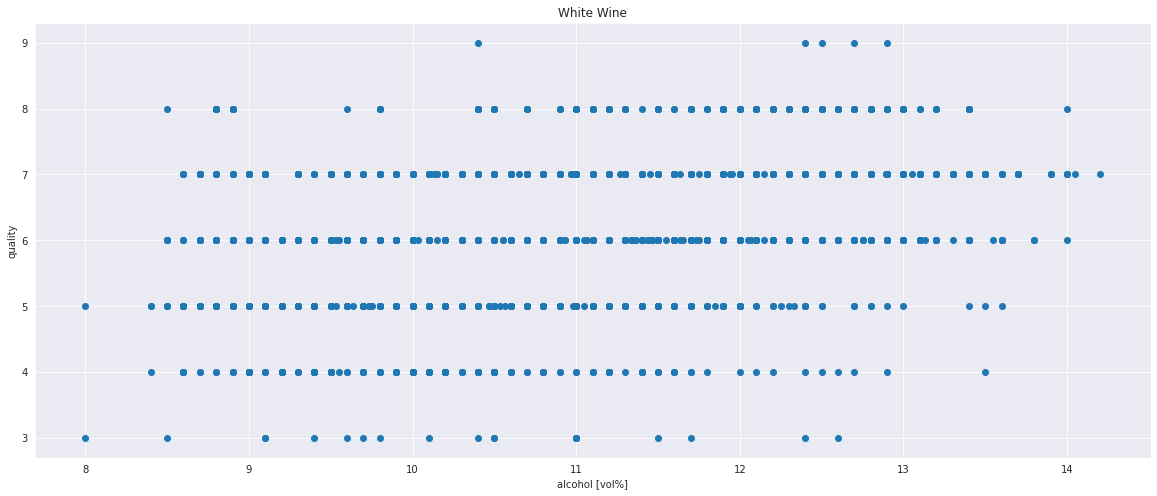

In [61]:
plt.figure(figsize=(20, 8))
plt.scatter(dataWhite['alcohol'], dataWhite['quality'])
plt.title("White Wine")
plt.xlabel('alcohol [vol%]')
plt.ylabel('quality')
plt.show()

# Learning Algorithms
### General Preprocessing

In [27]:
#first convert the strings 'white' and 'red' to 0 and 1 respectively
mapping = {'white': 0, 'red': 1}
data = data.replace({'type': mapping})

#Then split data into red and white again with that mapping
dataWhite = dataWhite.replace({'type': mapping})
dataRed = dataRed.replace({'type': mapping})

#split the data in attributes and class as well as training and test sets
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#split the data in attributes and class as well as training and test sets
XWhite = dataWhite.drop('quality', axis=1)
yWhite = dataWhite['quality']
XWhite_train, XWhite_test, yWhite_train, yWhite_test = train_test_split(XWhite, yWhite, test_size=0.20)

XRed = dataRed.drop('quality', axis=1)
yRed = dataRed['quality']
XRed_train, XRed_test, yRed_train, yRed_test = train_test_split(XRed, yRed, test_size=0.20)

## 1) Decision Tree
### Red and white combined

In [28]:
#Make decision tree and fit to training set
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
#Make predicition on test set
y_pred = classifier.predict(X_test)

#Print confusion matrix and other relevant statistics:
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (X_test.shape[0], (y_test != y_pred).sum()))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


 Number of mislabeled points out of a total 1300 points : 501 


[[  0   2   1   6   0   0   0]
 [  1  12  19  11   3   1   0]
 [  2  14 274 117  20   4   0]
 [  0  14  96 369  56  17   0]
 [  1   7  14  57 123  16   0]
 [  0   0   3   9   7  21   0]
 [  0   0   1   1   0   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.24      0.26      0.25        47
           5       0.67      0.64      0.65       431
           6       0.65      0.67      0.66       552
           7       0.59      0.56      0.58       218
           8       0.35      0.53      0.42        40
           9       0.00      0.00      0.00         3

    accuracy                           0.61      1300
   macro avg       0.36      0.38      0.37      1300
weighted avg       0.62      0.61      0.61      1300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### White and red seperately

In [30]:
#Make decision tree and fit to training set
classifierWhite = DecisionTreeClassifier()
classifierWhite.fit(XWhite_train, yWhite_train)

classifierRed = DecisionTreeClassifier()
classifierRed.fit(XRed_train, yRed_train)

DecisionTreeClassifier()

In [31]:
#----------------------WHITE--------------------#
yWhite_pred = classifier.predict(XWhite_test)
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XWhite_test.shape[0], (yWhite_test != yWhite_pred).sum()))
print(confusion_matrix(yWhite_test, yWhite_pred))
print(classification_report(yWhite_test, yWhite_pred))


 Number of mislabeled points out of a total 980 points : 72 


[[  0   1   0   1   0   0   0]
 [  0  32   7   0   3   0   0]
 [  0   0 282  18   3   0   0]
 [  0   1  14 411   7   2   0]
 [  0   0   2   7 148   4   0]
 [  0   0   0   1   0  35   0]
 [  0   0   1   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.94      0.76      0.84        42
           5       0.92      0.93      0.93       303
           6       0.94      0.94      0.94       435
           7       0.92      0.92      0.92       161
           8       0.85      0.97      0.91        36
           9       0.00      0.00      0.00         1

    accuracy                           0.93       980
   macro avg       0.65      0.65      0.65       980
weighted avg       0.92      0.93      0.92       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#-----------------------RED---------------------#
yRed_pred = classifier.predict(XRed_test)
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XRed_test.shape[0], (yRed_test != yRed_pred).sum()))
print(confusion_matrix(yRed_test, yRed_pred))
print(classification_report(yRed_test, yRed_pred))


 Number of mislabeled points out of a total 320 points : 35 


[[  0   0   1   2   0   0]
 [  0  10   0   1   0   0]
 [  1   3 115  10   2   1]
 [  0   1   6 120   5   0]
 [  0   1   0   1  36   0]
 [  0   0   0   0   0   4]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.67      0.91      0.77        11
           5       0.94      0.87      0.91       132
           6       0.90      0.91      0.90       132
           7       0.84      0.95      0.89        38
           8       0.80      1.00      0.89         4

    accuracy                           0.89       320
   macro avg       0.69      0.77      0.73       320
weighted avg       0.89      0.89      0.89       320



## 2) Naive Bayes
### Red and white combined

In [33]:
#Make Gaussian Classifier and fit to data 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
#Make predicition on test set
y_pred = classifier.predict(X_test)

#Print confusion matrix and other relevant statistics:
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (X_test.shape[0], (y_test != y_pred).sum()))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


 Number of mislabeled points out of a total 1300 points : 739 


[[  3   1   2   2   1   0   0]
 [  2   4  19  16   6   0   0]
 [ 15   9 223 157  26   1   0]
 [  5  10 152 233 141  10   1]
 [  2   3  26  67  91  26   3]
 [  0   1   3  13  16   7   0]
 [  0   0   0   1   1   1   0]]
              precision    recall  f1-score   support

           3       0.11      0.33      0.17         9
           4       0.14      0.09      0.11        47
           5       0.52      0.52      0.52       431
           6       0.48      0.42      0.45       552
           7       0.32      0.42      0.36       218
           8       0.16      0.17      0.16        40
           9       0.00      0.00      0.00         3

    accuracy                           0.43      1300
   macro avg       0.25      0.28      0.25      1300
weighted avg       0.44      0.43      0.43      1300



### White and red seperately

In [35]:
#Make decision tree and fit to training set
classifierWhite = GaussianNB()
classifierWhite.fit(XWhite_train, yWhite_train)

classifierRed = GaussianNB()
classifierRed.fit(XRed_train, yRed_train)

GaussianNB()

In [36]:
#----------------------WHITE--------------------#
yWhite_pred = classifier.predict(XWhite_test)
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XWhite_test.shape[0], (yWhite_test != yWhite_pred).sum()))
print(confusion_matrix(yWhite_test, yWhite_pred))
print(classification_report(yWhite_test, yWhite_pred))


 Number of mislabeled points out of a total 980 points : 578 


[[  1   0   0   1   0   0   0]
 [  1   2  15  19   5   0   0]
 [  2   2 106 168  24   1   0]
 [  1   0  81 198 138  13   4]
 [  0   0   9  43  88  19   2]
 [  0   0   2   5  20   7   2]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.20      0.50      0.29         2
           4       0.50      0.05      0.09        42
           5       0.50      0.35      0.41       303
           6       0.46      0.46      0.46       435
           7       0.32      0.55      0.40       161
           8       0.17      0.19      0.18        36
           9       0.00      0.00      0.00         1

    accuracy                           0.41       980
   macro avg       0.31      0.30      0.26       980
weighted avg       0.44      0.41      0.41       980



In [37]:
#-----------------------RED---------------------#
yRed_pred = classifier.predict(XRed_test)
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XRed_test.shape[0], (yRed_test != yRed_pred).sum()))
print(confusion_matrix(yRed_test, yRed_pred))
print(classification_report(yRed_test, yRed_pred))


 Number of mislabeled points out of a total 320 points : 164 


[[  1   1   1   0   0   0]
 [  0   6   4   1   0   0]
 [  6  14 105   4   3   0]
 [  3  11  77  39   2   0]
 [  6   0   5  22   5   0]
 [  0   0   0   3   1   0]]
              precision    recall  f1-score   support

           3       0.06      0.33      0.11         3
           4       0.19      0.55      0.28        11
           5       0.55      0.80      0.65       132
           6       0.57      0.30      0.39       132
           7       0.45      0.13      0.20        38
           8       0.00      0.00      0.00         4

    accuracy                           0.49       320
   macro avg       0.30      0.35      0.27       320
weighted avg       0.52      0.49      0.46       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3) k-NN

In [38]:
#Number of Neighbors evaluated:
NN = 1

#Make k-NN Classifier and fit to data 
classifier = KNeighborsClassifier(n_neighbors=NN)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
#Make predicition on test set
y_pred = classifier.predict(X_test)

#Print confusion matrix and other relevant statistics:
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (X_test.shape[0], (y_test != y_pred).sum()))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


 Number of mislabeled points out of a total 1300 points : 547 


[[  2   2   0   4   1   0   0]
 [  1   7  21  12   5   1   0]
 [  2   9 265 126  26   3   0]
 [  0  10 112 345  76   9   0]
 [  1   1  26  68 116   6   0]
 [  0   0   3  15   4  18   0]
 [  0   0   1   1   1   0   0]]
              precision    recall  f1-score   support

           3       0.33      0.22      0.27         9
           4       0.24      0.15      0.18        47
           5       0.62      0.61      0.62       431
           6       0.60      0.62      0.61       552
           7       0.51      0.53      0.52       218
           8       0.49      0.45      0.47        40
           9       0.00      0.00      0.00         3

    accuracy                           0.58      1300
   macro avg       0.40      0.37      0.38      1300
weighted avg       0.57      0.58      0.58      1300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### White and red seperately

In [40]:
#Make decision tree and fit to training set
classifierWhite = KNeighborsClassifier(n_neighbors=NN)
classifierWhite.fit(XWhite_train, yWhite_train)

classifierRed = KNeighborsClassifier(n_neighbors=NN)
classifierRed.fit(XRed_train, yRed_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
#----------------------WHITE--------------------#
yWhite_pred = classifier.predict(XWhite_test)
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XWhite_test.shape[0], (yWhite_test != yWhite_pred).sum()))
print(confusion_matrix(yWhite_test, yWhite_pred))
print(classification_report(yWhite_test, yWhite_pred))


 Number of mislabeled points out of a total 980 points : 78 


[[  1   0   0   0   1   0   0]
 [  1  31   6   3   1   0   0]
 [  0   1 276  22   4   0   0]
 [  0   0  12 412  10   1   0]
 [  0   1   6   7 147   0   0]
 [  0   0   0   1   0  35   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.50      0.50      0.50         2
           4       0.94      0.74      0.83        42
           5       0.92      0.91      0.92       303
           6       0.92      0.95      0.94       435
           7       0.90      0.91      0.91       161
           8       0.97      0.97      0.97        36
           9       0.00      0.00      0.00         1

    accuracy                           0.92       980
   macro avg       0.74      0.71      0.72       980
weighted avg       0.92      0.92      0.92       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#-----------------------RED---------------------#
yRed_pred = classifier.predict(XRed_test)
print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (XRed_test.shape[0], (yRed_test != yRed_pred).sum()))
print(confusion_matrix(yRed_test, yRed_pred))
print(classification_report(yRed_test, yRed_pred))


 Number of mislabeled points out of a total 320 points : 41 


[[  0   2   0   1   0   0]
 [  0   9   0   2   0   0]
 [  0   0 113  16   3   0]
 [  0   1   7 118   6   0]
 [  0   0   1   2  35   0]
 [  0   0   0   0   0   4]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.75      0.82      0.78        11
           5       0.93      0.86      0.89       132
           6       0.85      0.89      0.87       132
           7       0.80      0.92      0.85        38
           8       1.00      1.00      1.00         4

    accuracy                           0.87       320
   macro avg       0.72      0.75      0.73       320
weighted avg       0.87      0.87      0.87       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
